## Линейные модели, SVM и деревья решений.

Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.
Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите одну из линейных моделей, SVM и 3 дерево решений. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
data = pd.read_csv('Data/lab_5/winequalityN.csv',sep=",")
data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
data.shape

(6497, 13)

In [3]:
# Кодирование категориального признака(тип вина: красное или белое) в столбец wine_type_le
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.type)
data['wine_type_le'] = le.transform(data.type)
data.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_le
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [4]:
del data['type']

In [5]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_le
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [6]:
# Проверка на пустые значения
data.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
wine_type_le             0
dtype: int64

In [7]:
import pandas as pd
# function to clean the dataset of nan, Inf, and missing cells (for skewed datasets)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [8]:
clean_dataset(data)[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_le
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0,1.0


In [9]:
# Пустых значений нет
# Перейдем к разделению выборки на обучающую и тестовую.
X = data.drop('wine_type_le',axis = 1).values
y = data['wine_type_le'].values

In [10]:
from sklearn.model_selection import train_test_split
# Функция train_test_split разделила исходную выборку таким образом, 
#чтобы в обучающей и тестовой частях сохранились пропорции классов.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)

In [11]:
# Размер обучающей выборки (70%)
print('X_train: {}  y_train: {}'.format(X_train.shape, y_train.shape))

X_train: (4524, 12)  y_train: (4524,)


In [12]:
# Размер тестовой выборки (30%)
print('X_test: {}  y_test: {}'.format(X_test.shape, y_test.shape))

X_test: (1939, 12)  y_test: (1939,)


In [13]:
# Функция train_test_split разделила исходную выборку таким образом, 
#чтобы в обучающей и тестовой частях сохранились пропорции классов.
np.unique(y_train)

array([0, 1])

In [14]:
np.unique(y_test)

array([0, 1])

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

## Сравнение качества трех линейных моделей

### SGDClassifier (градиентный метод)

In [16]:
import warnings
warnings.filterwarnings('ignore')

sgd = SGDClassifier().fit(X_train, y_train)
predicted_sgd = sgd.predict(X_test)


In [17]:
accuracy_score(y_test, predicted_sgd)

0.7741103661681279

In [18]:
balanced_accuracy_score(y_test, predicted_sgd)

0.8412864309603441

In [19]:
(precision_score(y_test, predicted_sgd, average='weighted'), 
 recall_score(y_test, predicted_sgd, average='weighted'))

(0.8730518980385593, 0.7741103661681279)

In [20]:
f1_score(y_test, predicted_sgd, average='weighted')

0.7892751746523573

### LinearSVC  (линейный)

In [21]:
svc = LinearSVC(C=1.0).fit(X_train, y_train)
predicted_svc = svc.predict(X_test)

In [22]:
accuracy_score(y_test, predicted_svc)

0.9804022692109334

In [23]:
balanced_accuracy_score(y_test, predicted_svc)

0.9620461060678451

In [24]:
(precision_score(y_test, predicted_svc, average='weighted'), 
 recall_score(y_test, predicted_svc, average='weighted'))

(0.9807478230266101, 0.9804022692109334)

In [25]:
f1_score(y_test, predicted_svc, average='weighted')

0.9801578892898227

### DecisionTreeClassifier (дерево решений)

In [26]:
dtc = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
predicted_dtc = dtc.predict(X_test)

In [27]:
accuracy_score(y_test, predicted_dtc)

0.9896854048478597

In [28]:
balanced_accuracy_score(y_test, predicted_dtc)

0.9882893374741202

In [29]:
(precision_score(y_test, predicted_dtc, average='weighted'), 
 recall_score(y_test, predicted_dtc, average='weighted'))

(0.9897527301109915, 0.9896854048478597)

In [30]:
f1_score(y_test, predicted_dtc, average='weighted')

0.9897065917780767

In [31]:
n_range = np.array(range(0,100,5))
n_range = n_range / 100
tuned_parameters = [{'l1_ratio': n_range}]
tuned_parameters

[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}]

### Подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации

In [32]:
import warnings
warnings.filterwarnings('ignore')

clf_gs_sgd = GridSearchCV(SGDClassifier(), tuned_parameters, cv=5,
                      scoring='accuracy')
clf_gs_sgd.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [33]:
clf_gs_sgd.best_params_

{'l1_ratio': 0.5}

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

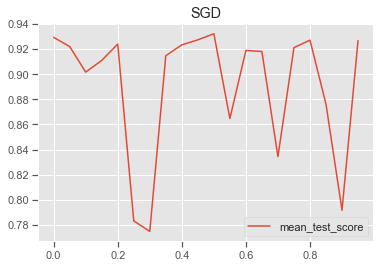

In [35]:
plt.title('SGD')
plt.plot(n_range, clf_gs_sgd.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

In [36]:
n_range = np.array(range(1,20,1))
tuned_parameters = [{'C': n_range}]
tuned_parameters

[{'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19])}]

In [37]:
clf_gs_svm = GridSearchCV(LinearSVC(), tuned_parameters, cv=3,
                      scoring='accuracy')
clf_gs_svm.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
clf_gs_svm.best_params_

{'C': 19}

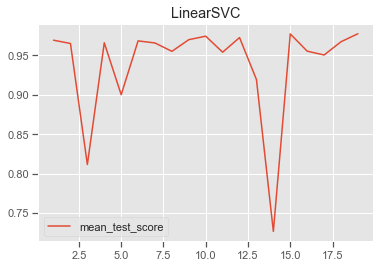

In [39]:
plt.title('LinearSVC')
plt.plot(n_range, clf_gs_svm.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

In [40]:
n_range = np.array(range(1,7,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6])}]

In [41]:
clf_gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters,
                          cv=5, scoring='accuracy')
clf_gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
clf_gs_dt.best_params_

{'max_depth': 6}

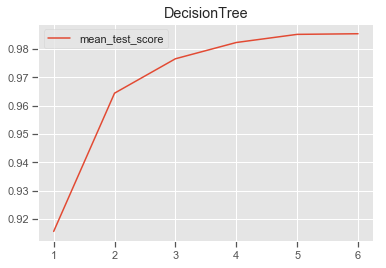

In [43]:
plt.title('DecisionTree')
plt.plot(n_range, clf_gs_dt.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

### Сравнение качества полученных моделей с качеством моделей, полученных ранее
### SGD

In [44]:
sgd_optimized = SGDClassifier(l1_ratio=clf_gs_sgd.best_params_['l1_ratio']).fit(X_train, y_train)
predicted_sgd_opt = sgd_optimized.predict(X_test)

In [45]:
accuracy_score(y_test, predicted_sgd_opt)

0.9406910778751933

In [46]:
balanced_accuracy_score(y_test, predicted_sgd_opt)

0.9093157748049052

In [47]:
(precision_score(y_test, predicted_sgd_opt, average='weighted'), 
 recall_score(y_test, predicted_sgd_opt, average='weighted'))

(0.9399862610608563, 0.9406910778751933)

In [48]:
f1_score(y_test, predicted_sgd_opt, average='weighted')

0.9399744973367767

### LinearSVC

In [49]:
svm_optimized = LinearSVC(C=clf_gs_svm.best_params_['C']).fit(X_train, y_train)
predicted_svm_opt = svm_optimized.predict(X_test)

In [50]:
accuracy_score(y_test, predicted_svm_opt)

0.9840123775141826

In [51]:
balanced_accuracy_score(y_test, predicted_svm_opt)

0.9699842729734034

In [52]:
(precision_score(y_test, predicted_svm_opt, average='weighted'), 
 recall_score(y_test, predicted_svm_opt, average='weighted'))

(0.9841716854842232, 0.9840123775141826)

In [53]:
f1_score(y_test, predicted_svm_opt, average='weighted')

0.9838680461007199

### DecisionTree

In [54]:
dt_optimized = DecisionTreeClassifier(max_depth=clf_gs_dt.best_params_['max_depth']).fit(X_train, y_train)
predicted_dt_opt = dt_optimized.predict(X_test)

In [55]:
accuracy_score(y_test, predicted_dt_opt)

0.9896854048478597

In [56]:
balanced_accuracy_score(y_test, predicted_dt_opt)

0.9848303870043

In [57]:
(precision_score(y_test, predicted_dt_opt, average='weighted'), 
 recall_score(y_test, predicted_dt_opt, average='weighted'))

(0.9896679065842275, 0.9896854048478597)

In [58]:
f1_score(y_test, predicted_dt_opt, average='weighted')

0.9896710352653659

Вывод наибольшая точность у дерева решений, затем идет линейный метод, а потом SGD (стохастический градиентный метод)